This code is used for visualizing a set of Lagranto trajectories using the lagranto python package

In [3]:
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from wrf import to_np, getvar, CoordPair, vertcross, latlon_coords, interplevel
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.feature import NaturalEarthFeature
import glob
import wrf
import pandas as pd
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from metpy.plots import ctables
import metpy.calc as mpcalc
from metpy.plots import Hodograph, SkewT
from metpy.units import units
import matplotlib.gridspec as gridspec
from lagranto import Tra
from matplotlib import colors

In [4]:
file = "/home/getker/lagranto_codes/traj_trace_21z.ll"
data = Dataset("/home/getker/lagranto/hires_wrfout", "r", format="NETCDF4")
top = getvar(data, "HGT")
lm = getvar(data, "LANDMASK")
t = getvar(data, "T2")
t = (t - 273) * (9/5) + 32
wrf_lats, wrf_lons = latlon_coords(top)
print(top.shape)

(520, 527)


/tmp/ipykernel_868/2413940330.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('jet')


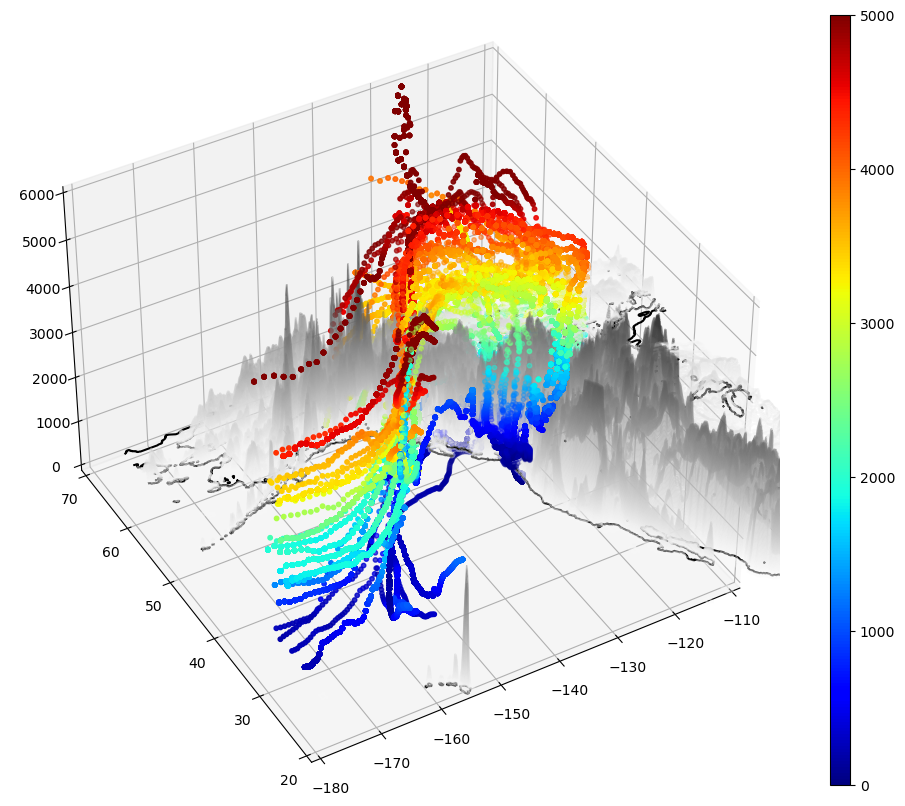

In [5]:
"""
3D trajectory path plot, color coded by potential temperature
"""
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection = '3d')
ax.contour3D(wrf_lons, wrf_lats, top, 200, cmap = 'gray_r', zorder = 10, alpha = .4)
ax.contour3D(wrf_lons, wrf_lats, lm, 0,colors = 'black')
ax.axes.set_xlim3d(left=-180, right=-110) 
ax.axes.set_ylim3d(bottom=20, top=70) 
ax.axes.set_zlim3d(bottom=0, top=6000) 
ax.view_init(40, -120)

trajs = Tra()
trajs.load_ascii(file)
for j in range(len(trajs)):
    traj_lons = trajs['lon'][j]
    traj_lons = np.delete(traj_lons, np.where(traj_lons == -999))
    traj_lons = traj_lons - 360
    traj_lats = trajs['lat'][j]
    traj_lats = np.delete(traj_lats, np.where(traj_lats == -999))
    traj_zs = trajs['z'][j]
    traj_zs = np.delete(traj_zs, np.where(traj_zs == -999))
    cmap = plt.cm.get_cmap('jet')
    data = ax.scatter3D(traj_lons, traj_lats, traj_zs, c = traj_zs, cmap = cmap, s = 10, vmin = 0, vmax = 5000)
for k in range(len(traj_lats) - 1):
    ax.plot3D(traj_lons[k:k+2], traj_lats[k:k+2], traj_zs[k:k+2], color = data.to_rgba(traj_zs[k]))
cax = fig.add_axes([ax.get_position().x1+0.05,ax.get_position().y0,0.02,ax.get_position().height]) 
cbar = plt.colorbar(data, cax = cax)

0/863


/tmp/ipykernel_868/2330462105.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('jet')


10/863
20/863
30/863
40/863
50/863
60/863
70/863
80/863
90/863
100/863
110/863
120/863
130/863
140/863
150/863
160/863
170/863
180/863
190/863
200/863
210/863
220/863
230/863
240/863
250/863
260/863
270/863
280/863
290/863
300/863
310/863
320/863
330/863
340/863
350/863
360/863
370/863
380/863
390/863
400/863
410/863
420/863
430/863
440/863
450/863
460/863
470/863
480/863
490/863
500/863
510/863
520/863
530/863
540/863
550/863
560/863
570/863
580/863
590/863
600/863
610/863
620/863
630/863
640/863
650/863
660/863
670/863
680/863
690/863
700/863
710/863
720/863
730/863
740/863
750/863
760/863
770/863
780/863
790/863
800/863
810/863
820/863
830/863
840/863
850/863
860/863


Text(0, 0.5, 'Trajectory height (m)')

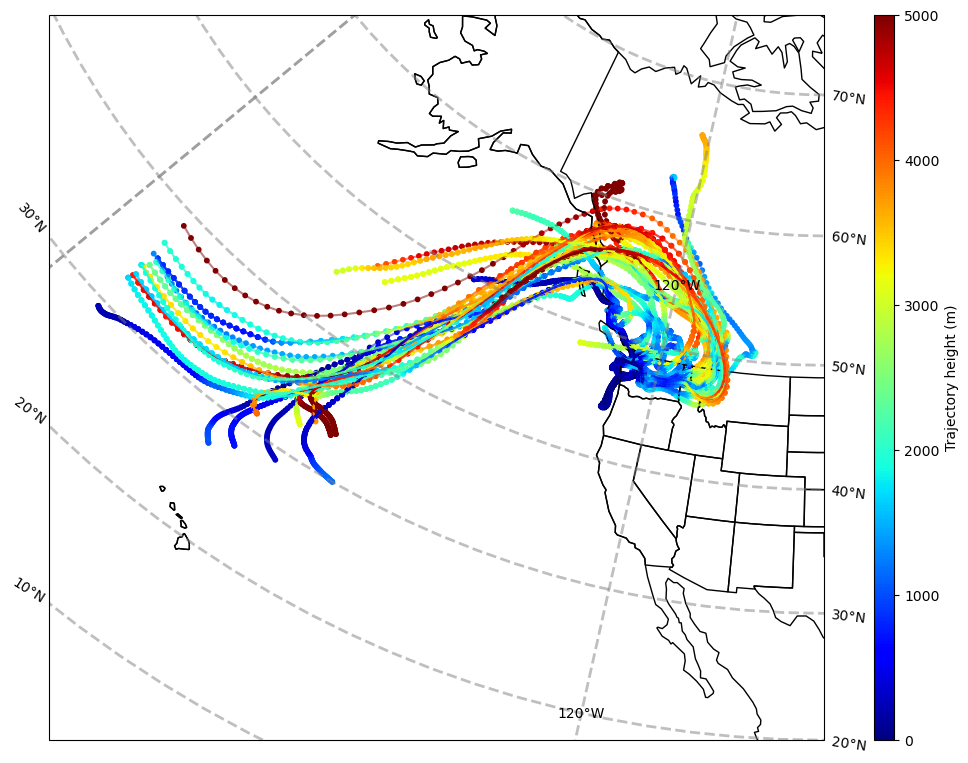

In [7]:
"""
2D trajectory path plot, color coded by potential temperature
"""
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.LambertConformal(central_longitude = -100))
ax.add_feature(cfeature.STATES, edgecolor='black')  #Add US states
ax.add_feature(cfeature.COASTLINE, edgecolor='black')  #Add coastlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
ax.set_extent([-170, -100, 20, 65], crs=ccrs.PlateCarree())
#ax.contour(wrf_lons, wrf_lats, top, transform=ccrs.PlateCarree(), cmap = 'terrain', levels = 100, vmin = 0, vmax = 3000)
#cax = fig.add_axes([ax.get_position().x1+0.05,ax.get_position().y0,0.02,ax.get_position().height])  #You can change the numbers to move the colorbar.
trajs = Tra()
trajs.load_ascii(file)
lons = trajs['lon']
lats = trajs['lat']
zs = trajs['z']
for j in range(len(lons)):
    if j % 10 == 0: #only plotting every 10 trajectories
        print(str(j) + "/" + str(len(lons)))
        traj_lon = lons[j,:]
        traj_lat = lats[j,:]
        traj_z = zs[j, :]
        traj_lon = np.delete(traj_lon, np.where(traj_lon == -999))
        traj_z = np.delete(traj_z, np.where(traj_lat == -999))
        traj_lat = np.delete(traj_lat, np.where(traj_lat == -999))
        cmap = plt.cm.get_cmap('jet')
        data = ax.scatter(traj_lon, traj_lat, c = traj_z, cmap = cmap, transform=ccrs.PlateCarree(), s = 10, vmin = 0, vmax = 5000)
        for k in range(len(traj_lat) - 1):
            ax.plot(traj_lon[k:k+2], traj_lat[k:k+2], transform=ccrs.PlateCarree(), color = data.to_rgba(traj_z[k]), alpha = .5)
cax = fig.add_axes([ax.get_position().x1+0.05,ax.get_position().y0,0.02,ax.get_position().height]) 
cbar = plt.colorbar(data, cax = cax)
cbar.ax.set_ylabel('Trajectory height (m)')

0/863
1/166
2/166
3/166
4/166
5/166
6/166
7/166
8/166
9/166
10/166
11/166
12/166
13/166
14/166
15/166
16/166
17/166
18/166
19/166
20/166
21/166
22/166
23/166
24/166
25/166
26/166
27/166
28/166
29/166
30/166
31/166
32/166
33/166
34/166
35/166
36/166
37/166
38/166
39/166
40/166
41/166
42/166
43/166
44/166
45/166
46/166
47/166
48/166
49/166
50/166
51/166
52/166
53/166
54/166
55/166
56/166
57/166
58/166
59/166
60/166
61/166
62/166
63/166
64/166
65/166
66/166
67/166
68/166
69/166
70/166
71/166
72/166
73/166
74/166
75/166
76/166
77/166
78/166
79/166
80/166
81/166
82/166
83/166
84/166
85/166
86/166
87/166
88/166
89/166
90/166
91/166
92/166
93/166
94/166
95/166
96/166
97/166
98/166
99/166
100/166
101/166
102/166
103/166
104/166
105/166
106/166
107/166
108/166
109/166
110/166
111/166
112/166
113/166
114/166
115/166
116/166
117/166
118/166
119/166
120/166
121/166
122/166
123/166
124/166
125/166
126/166
127/166
128/166
129/166
130/166
131/166
132/166
133/166
134/166
135/166
136/166
137/166
138/16

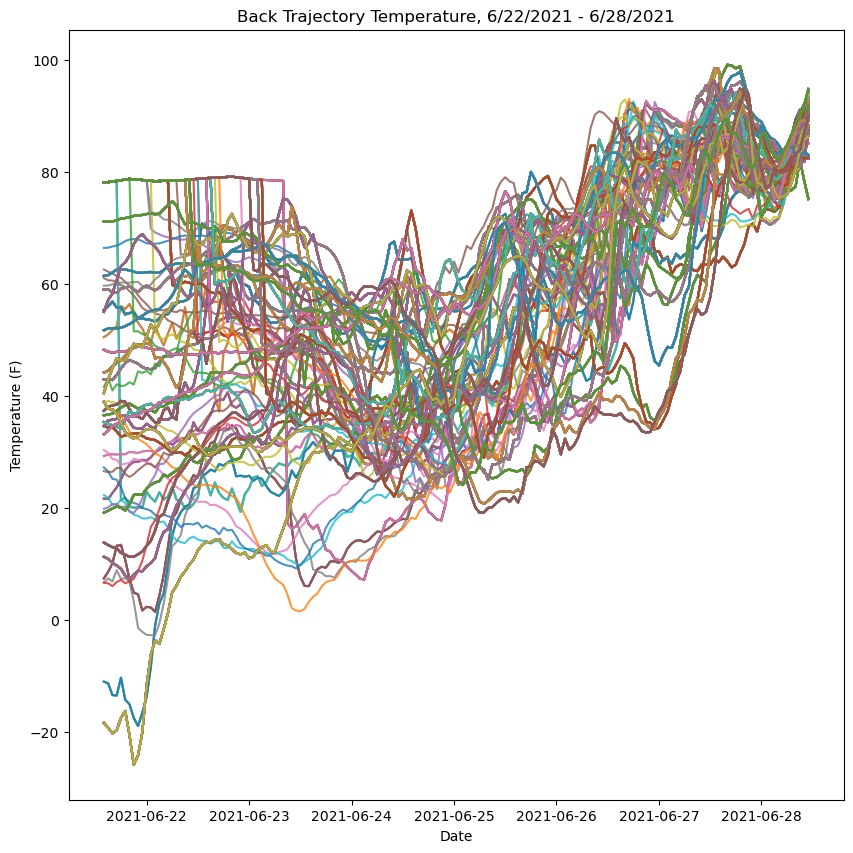

In [10]:
"""
Back trajectory temperature time series
"""
fig = plt.figure(figsize=(10,10))
plt.title("Back Trajectory Temperature, 6/22/2021 - 6/28/2021")
plt.xlabel("Date")
plt.ylabel("Temperature (F)")
all_t = []
trajs = Tra()
trajs.load_ascii(file)
for j in range(len(trajs)):
    print(str(j) + "/" + str(len(lons)))
    lons = trajs['lon'][j]
    lats = trajs['lat'][j]
    t = trajs['T'][j]
    p_per = trajs['P'][j] 
    p_base = trajs['PB'][j]
    p = p_per + p_base
    temp = mpcalc.temperature_from_potential_temperature(units.Quantity(p, "Pa"), units.Quantity(t, "K")).magnitude
    temp = (9/5) * (temp - 273) + 32
    new_dates = []
    new_z = []
    startdate = pd.Timestamp(2021, 6, 28, 12)
    for k in range(len(temp)):
        startdate = startdate - pd.Timedelta(1, "hour")
        if t[k] != -999:
            new_z.append(temp[k])
            new_dates.append(startdate)
    plt.plot(new_dates, new_z, alpha = .8)

0/1


/home/getker/anaconda3/lib/python3.10/site-packages/metpy/calc/thermo.py:1384: RuntimeWarning: divide by zero encountered in log
  val = np.log(vapor_pressure / mpconsts.nounit.sat_pressure_0c)
/home/getker/anaconda3/lib/python3.10/site-packages/metpy/calc/thermo.py:1385: RuntimeWarning: invalid value encountered in double_scalars
  return mpconsts.nounit.zero_degc + 243.5 * val / (17.67 - val)


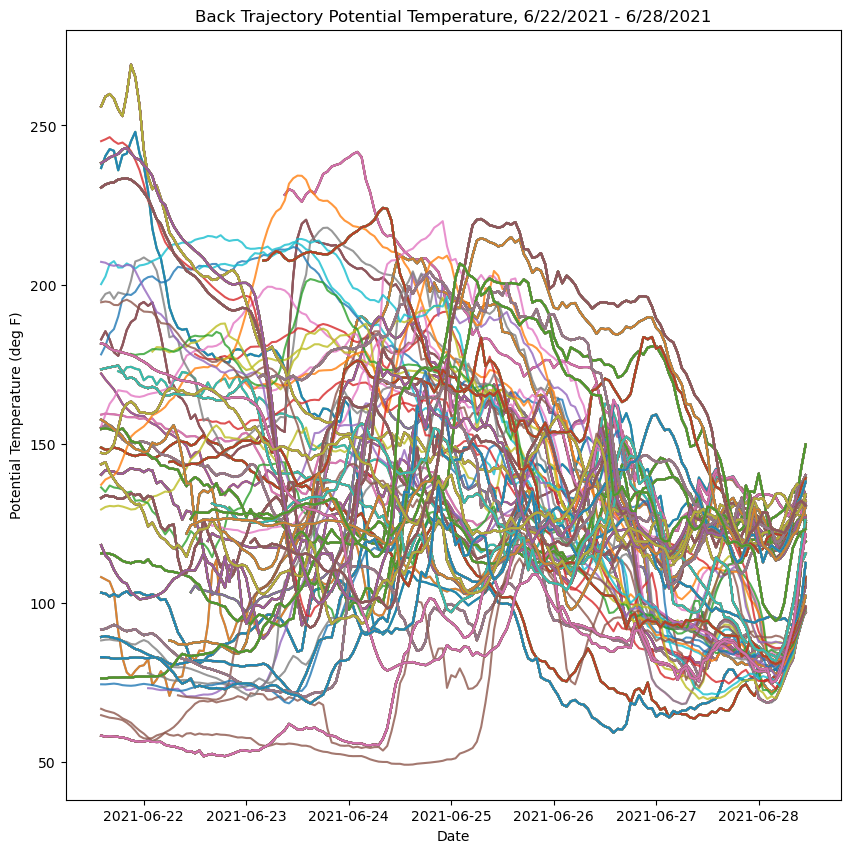

In [ ]:
"""
Back trajectory potential temperature time series
"""
fig = plt.figure(figsize=(10,10))
plt.title("Back Trajectory Potential Temperature, 6/22/2021 - 6/28/2021")
plt.xlabel("Date")
plt.ylabel("Potential Temperature (deg F)")
trajs = Tra()
trajs.load_ascii(file)
for j in range(len(trajs)):
    print(str(j) + "/" + str(len(lons)))
    lons = trajs['lon'][j]
    lats = trajs['lat'][j]
    t = trajs['T'][j]
    p_per = trajs['P'][j] 
    p_base = trajs['PB'][j]
    q = trajs['QVAPOR'][j]
    #Conversions...
    p = p_per + p_base
    thetae = np.zeros_like(q)
    for k in range(len(thetae)):
        if lons[k] == -999:
            thetae[k] = -999
        else:
            e = mpcalc.vapor_pressure(units.Quantity(p[k], "Pa"), q[k])
            td = mpcalc.dewpoint(e)
            thetae[k] = (9/5) * (mpcalc.potential_temperature(units.Quantity(p[k], "Pa"), units.Quantity(t[k], "K")).magnitude - 273) + 32#, td).magnitude
    new_dates = []
    new_z = []
    startdate = pd.Timestamp(2021, 6, 28, 12)
    for k in range(len(thetae)):
        startdate = startdate - pd.Timedelta(1, "hour")
        if thetae[k] != -999:
            new_z.append(thetae[k])
            new_dates.append(startdate)
    plt.plot(new_dates, new_z, alpha = .8)
    #plt.ylim(-.5, .5)

0/1


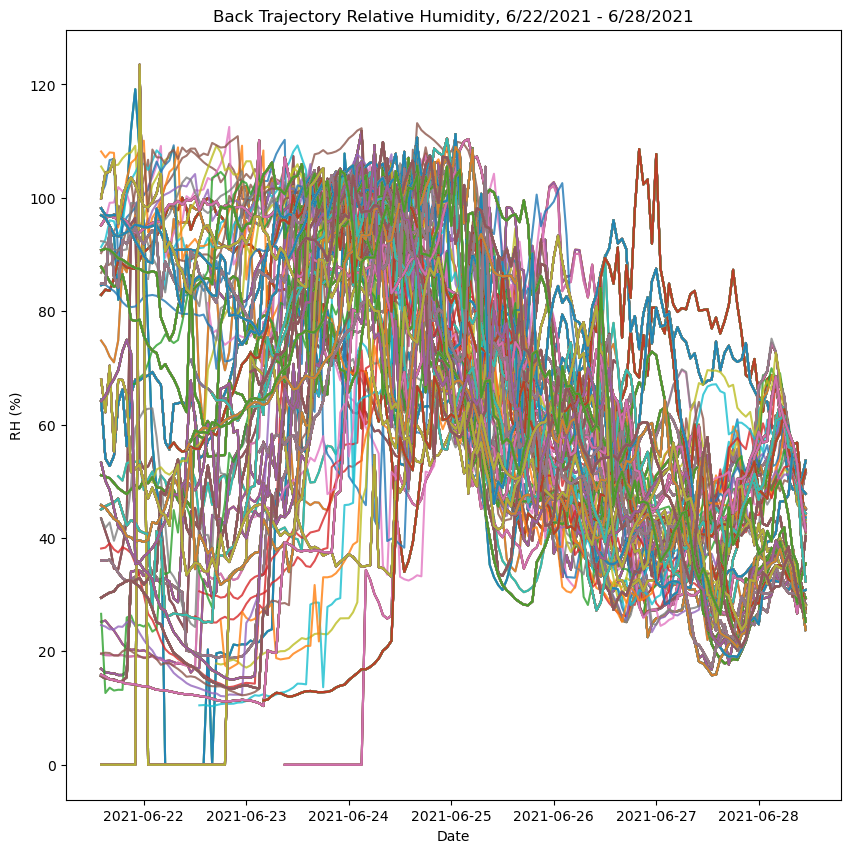

In [ ]:
"""
Back trajectory relative humidity time series
"""
fig = plt.figure(figsize=(10,10))
plt.title("Back Trajectory Relative Humidity, 6/22/2021 - 6/28/2021")
plt.xlabel("Date")
plt.ylabel("RH (%)")
trajs = Tra()
trajs.load_ascii(file)
for j in range(len(trajs)):
    print(str(j) + "/" + str(len(lons)))
    lons = trajs['lon'][j]
    lats = trajs['lat'][j]
    t = trajs['T'][j]
    p_per = trajs['P'][j] 
    p_base = trajs['PB'][j]
    q = trajs['QVAPOR'][j]
    #Conversions...
    p = p_per + p_base
    thetae = np.zeros_like(q)
    for k in range(len(thetae)):
        if lons[k] == -999:
            thetae[k] = -999
        else:
            temp = mpcalc.temperature_from_potential_temperature(units.Quantity(p, "Pa"), units.Quantity(t[k], "K")).magnitude
            thetae[k] = mpcalc.relative_humidity_from_specific_humidity(units.Quantity(p[k], "Pa"), units.Quantity(temp[k], "K"), q[k]).magnitude * 100
    new_dates = []
    new_z = []
    startdate = pd.Timestamp(2021, 6, 28, 12)
    for k in range(len(thetae)):
        startdate = startdate - pd.Timedelta(1, "hour")
        if thetae[k] != -999:
            new_z.append(thetae[k])
            new_dates.append(startdate)
    plt.plot(new_dates, new_z, alpha = .8)
    #plt.ylim(-.5, .5)

0/1
2917.0
2907.0
5423.0
5413.0
5403.0
5393.0
3951.0
3941.0
3931.0
3921.0
5685.0
5675.0
5665.0
5655.0
5645.0
5635.0
5625.0
6384.0
6374.0
6364.0
6354.0
3715.0
3705.0
3695.0
3685.0
3256.0
3246.0
3322.0
3312.0
3302.0
3292.0
3282.0
3272.0
3262.0
3252.0
3242.0
3232.0
3222.0
3212.0
3202.0
3192.0
3182.0
3172.0
3162.0
3152.0
3142.0
3132.0
3122.0
3112.0
3102.0
3092.0
3082.0
3072.0
3062.0
2078.0
2068.0
2058.0
2048.0
2038.0
2028.0
2018.0
2008.0
1998.0
1988.0
1978.0
1968.0
1958.0
1948.0
1938.0
1928.0
1918.0
1908.0
1898.0
1888.0
1878.0
1868.0
1858.0
1848.0
1838.0
1828.0
1818.0
3102.0
3092.0
3082.0
3072.0
3062.0
3052.0
3042.0
3032.0
3022.0
3012.0
3002.0
2992.0
2982.0
2972.0
2962.0
2952.0
2942.0
2932.0
2922.0
2912.0
2902.0
2892.0
2882.0
2872.0
2862.0
2852.0
2842.0
3845.0
3835.0
3825.0
3815.0
3805.0
3795.0
3785.0
3775.0
3765.0
3755.0
3745.0
3735.0
3725.0
3715.0
3705.0
3695.0
3685.0
3675.0
3665.0
3655.0
3645.0
3635.0
3625.0
3615.0
3605.0
3595.0
3585.0
4809.0
4799.0
4789.0
4779.0
4769.0
4759.0
4749.0
47

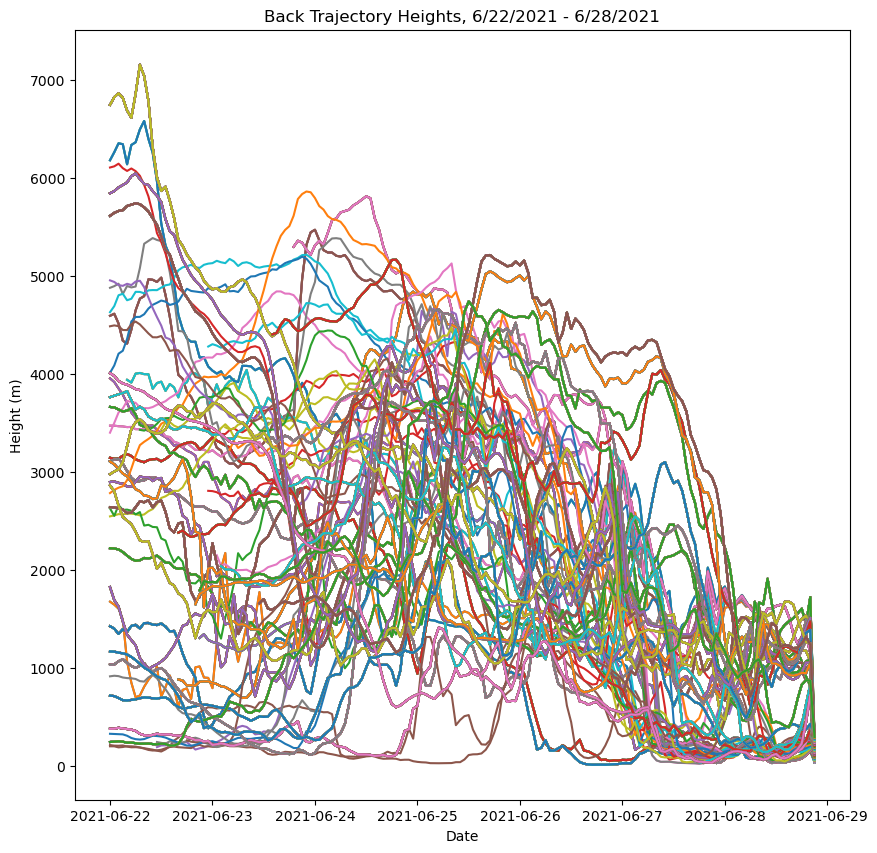

In [ ]:
"""
Back trajectory height time series
"""
dates = pd.date_range(start = pd.Timestamp(2021, 6, 22, 0), end = pd.Timestamp(2021, 6, 28, 21), freq = 'H')
dates = np.flip(dates)
fig = plt.figure(figsize=(10,10))
plt.title("Back Trajectory Heights, 6/22/2021 - 6/28/2021")
plt.xlabel("Date")
plt.ylabel("Height (m)")
trajs = Tra()
trajs.load_ascii(file)
for j in range(len(trajs)):
    print(str(j) + "/" + str(len(lons)))
    z = trajs['z'][j]
    traj_dates = np.delete(dates, np.where(z == -999))
    traj_z = np.delete(z, np.where(z == -999))
    max = np.max(traj_z)
    sfc_z = traj_z[0]
    plt.plot(traj_dates, traj_z)

0/1


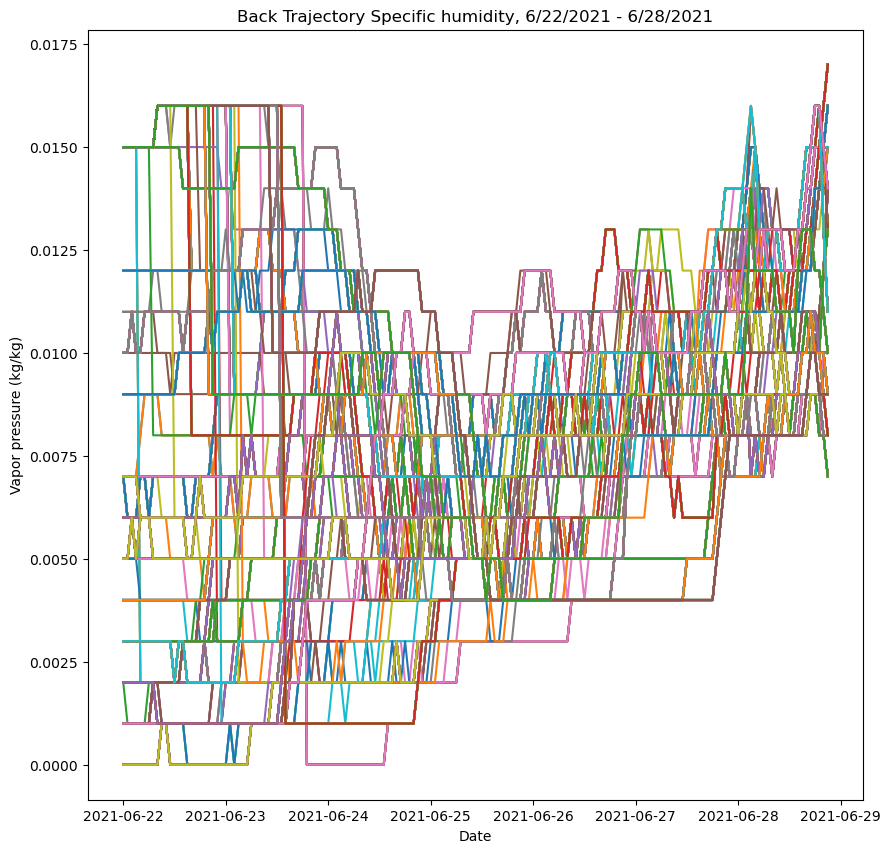

In [ ]:
"""
Back trajectory specific humidity time series
"""
dates = pd.date_range(start = pd.Timestamp(2021, 6, 22, 0), end = pd.Timestamp(2021, 6, 28, 21), freq = 'H')
dates = np.flip(dates)
fig = plt.figure(figsize=(10,10))
plt.title("Back Trajectory Specific humidity, 6/22/2021 - 6/28/2021")
plt.xlabel("Date")
plt.ylabel("Vapor pressure (kg/kg)")
trajs = Tra()
trajs.load_ascii(file)
for j in range(len(trajs)):
    print(str(j) + "/" + str(len(lons)))
    q = trajs['QVAPOR'][j]
    z = trajs['z'][j]
    traj_dates = np.delete(dates, np.where(z == -999))
    traj_q = np.delete(q, np.where(z == -999))
    plt.plot(traj_dates, traj_q)